In [19]:
from Bio.Seq import Seq
import numpy as np
import matplotlib.pyplot as plt

seqA = Seq("CGATCGAT")
seqB = Seq("ACGTGTAC")

In [20]:
#Global Alignment

from Bio import pairwise2

alignments = pairwise2.align.globalxx(seqA, seqB)

#print the alignments

for alignment in alignments:
    print(alignment)

#print visual
    
from Bio.pairwise2 import format_alignment

for alignment in alignments:
    print(format_alignment(*alignment))

Alignment(seqA='-CGATCGAT--', seqB='ACG-T-G-TAC', score=5.0, start=0, end=11)
Alignment(seqA='-CGATCG-AT-', seqB='ACG-T-GTA-C', score=5.0, start=0, end=11)
Alignment(seqA='-CGATCG-AT', seqB='ACG-T-GTAC', score=5.0, start=0, end=10)
-CGATCGAT--
 || | | |  
ACG-T-G-TAC
  Score=5

-CGATCG-AT-
 || | | |  
ACG-T-GTA-C
  Score=5

-CGATCG-AT
 || | | |.
ACG-T-GTAC
  Score=5



In [21]:
#ending for alignment
#xx -> default --> if there is a connection, add 1 point
#mx -> custom match (give how many points), mismatch (subtract how many points)
#ms -> custom match, mismatch, gap start (every gap except the extend), gap extend (at the very end)


#match = 1 point, mismatch = -1 point, gap start = -0.5 points, gap extend = -0.1 points
alignments = pairwise2.align.globalms(seqA,seqB,1,-1,-0.5,-0.1)

for alignment in alignments:
    print(format_alignment(*alignment))

-CGATCGAT--
 || | | |  
ACG-T-G-TAC
  Score=2.4



In [22]:
#Local Alignment

alignments = pairwise2.align.localxx(seqA,seqB)

#print the alignments

for alignment in alignments:
    print(alignment)

#print visual

for alignment in alignments:
    print(format_alignment(*alignment))

Alignment(seqA='-CGATCGAT--', seqB='ACG-T-G-TAC', score=5.0, start=1, end=9)
Alignment(seqA='-CGATCG-AT', seqB='ACG-T-GTAC', score=5.0, start=1, end=9)
1 CGATCGAT
  || | | |
2 CG-T-G-T
  Score=5

1 CGATCG-A
  || | | |
2 CG-T-GTA
  Score=5



In [23]:
#seqA = CGATCGAT
#seqB = ACGTGTAC

def hamming_distance(s1, s2):
    return sum(ch1 != ch2 for ch1, ch2 in zip(s1, s2))

def hamming(s1,s2):
    mismatch_count = []
    for ch1,ch2 in zip(s1,s2):
        if ch1 != ch2:
            mismatch_count.append((ch1,ch2))
    return len(mismatch_count)

box = zip(seqA,seqB)
list_box = list(box)    

print(list_box)

print(hamming_distance(seqA,seqB))
print(hamming(seqA,seqB))

[('C', 'A'), ('G', 'C'), ('A', 'G'), ('T', 'T'), ('C', 'G'), ('G', 'T'), ('A', 'A'), ('T', 'C')]
6
6


In [24]:
#seqA = CGATCGAT
#seqB = ACGTGTAC

#Levenshtein Distance

#import levenshtein
%pip install python-Levenshtein


def levenshtein_distance(s1,s2):
    if len(s1) > len(s2):
        s1,s2 = s2,s1
    distances = range(len(s1) + 1)
    for index2,char2 in enumerate(s2):
        new_distances = [index2 + 1]
        for index1,char1 in enumerate(s1):
            if char1 == char2:
                new_distances.append(distances[index1])
            else:
                new_distances.append(1 + min((distances[index1],distances[index1 + 1],new_distances[-1])))
        distances = new_distances
    return distances[-1]

Note: you may need to restart the kernel to use updated packages.


In [25]:
from Levenshtein import distance

#the minimum steps to make seqB into seqA
print (distance(seqA,seqB))

print (levenshtein_distance(seqA,seqB))

5
5


In [55]:
#Dot Plotting

def delta(x,y):
    return 0 if x == y else 1



# i = starting position of seq1
# j = starting position of seq2
# k = how may nucleotides in a row need to be the same
def M(seq1, seq2, i, j, k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))

def M2(seq1, seq2, i, j, k):
    m = []
    for x,y in zip(seq1[i:i+k],seq2[j:j+k]):
        m.append(delta(x,y))
    return sum(m)

def makeMatrix(seq1, seq2, k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]

def makeMatrix2(seq1, seq2, k):
    m1 = []
    for i in range(len(seq1) - k + 1):
        m2 = []
        for j in range(len(seq2) - k + 1):
            m2.append(M2(seq1,seq2,i,j,k))
        m1.append(m2)
        #m2 is one row
        #m1 is the entire array
    return m1

def plotMatrix(M,t, seq1, seq2):
    plt.imshow(M, interpolation = 'none', cmap = 'gray')
    plt.title(t)
    plt.xticks(range(len(seq2)),seq2)
    plt.yticks(range(len(seq1)),seq1)
    plt.show()

def plotMatrix2(M,seq1,seq2,nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'* (4 + len(seq2)))
    for nucleotide, row in zip(seq1,M):
        line = ''.join(nonblank if s < 1 else blank for s in row)
        print(nucleotide + '|' + line)


def dotPlot(seq1, seq2, k = 1):
    m = makeMatrix(seq1,seq2,k)
    plotMatrix(m, 'Dot Plot', seq1, seq2)

def dotPlot2(seq1, seq2, k = 1):
    m = makeMatrix2(seq1,seq2,k)
    plotMatrix2(m,seq1,seq2)



In [56]:
#Aslab

dotPlot2(seqA,seqB,1)

 |ACGTGTAC
------------
C| ■     ■
G|  ■ ■   
A|■     ■ 
T|   ■ ■  
C| ■     ■
G|  ■ ■   
A|■     ■ 
T|   ■ ■  


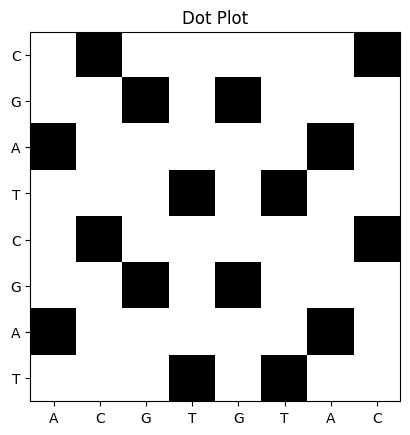

In [44]:
#Copilot

dotPlot(seqA,seqB,1)